In [1]:
import os, sys, json
import pandas as pd
import geopandas as gpd
from shapely import geometry

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


Bad key "text.kerning_factor" on line 4 in
/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:

colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [3]:
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

### visualise railways pre

In [6]:
railways_n_pre = pd.read_csv(os.path.join('.','..','results_backup','output','railway_nodes_dataframe.csv'))

In [17]:
railways_e_pre = pd.read_csv(os.path.join('.','..','results_backup','output','railway_edge_dataframe.csv'))

In [19]:
railways_n_pre

,coordinates,RailwayNodeID:ID(RailwayNode),lat,long,:LABEL
0,"(-158.15219300029378, 21.387556000051557)",railway_node_-158.1521930002937821.38755600005...,-158.152193,21.387556,RailwayNode
1,"(-158.15216799970239, 21.38780900006117)",railway_node_-158.1521679997023921.38780900006117,-158.152168,21.387809,RailwayNode
2,"(-158.15211900047154, 21.3871660001145)",railway_node_-158.1521190004715421.3871660001145,-158.152119,21.387166,RailwayNode
3,"(-158.15187400009557, 21.38819900025087)",railway_node_-158.1518740000955721.38819900025087,-158.151874,21.388199,RailwayNode
4,"(-158.15187399963196, 21.386891000336703)",railway_node_-158.1518739996319621.38689100033...,-158.151874,21.386891,RailwayNode
...,...,...,...,...,...
5219765,"(179.59374990853584, -16.321222378757763)",railway_node_179.59374990853584-16.32122237875...,179.593750,-16.321222,RailwayNode
5219766,"(179.59446716456043, -16.324194025562907)",railway_node_179.59446716456043-16.32419402556...,179.594467,-16.324194,RailwayNode
5219767,"(179.59683231035925, -16.279861429547147)",railway_node_179.59683231035925-16.27986142954...,179.596832,-16.279861,RailwayNode
5219768,"(179.60139458135137, -16.283721943758717)",railway_node_179.60139458135137-16.28372194375...,179.601395,-16.283722,RailwayNode


In [20]:
railways_e_pre = railways_e_pre.merge(railways_n_pre[['coordinates','RailwayNodeID:ID(RailwayNode)']], how='left',left_on='StartNodeId:START_ID(RailwayNode)', right_on='RailwayNodeID:ID(RailwayNode)')

In [21]:
railways_e_pre = railways_e_pre.merge(railways_n_pre[['coordinates','RailwayNodeID:ID(RailwayNode)']], how='left',left_on='EndNodeId:END_ID(RailwayNode)', right_on='RailwayNodeID:ID(RailwayNode)')

In [22]:
railways_e_pre = railways_e_pre.rename(columns={'coordinates_x':'start_coordinates','coordinates_y':'end_coordinates'})

In [24]:
railways_e_pre['start_coordinates'] = railways_e_pre['start_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)
railways_e_pre['end_coordinates'] = railways_e_pre['end_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)


In [25]:
railways_e_pre['geometry'] = railways_e_pre[['start_coordinates', 'end_coordinates']].values.tolist()

In [26]:
railways_e_pre['geometry'] = railways_e_pre['geometry'].apply(geometry.LineString)

In [27]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [28]:
r_e_pre = gpd.GeoDataFrame(railways_e_pre, geometry=railways_e_pre['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


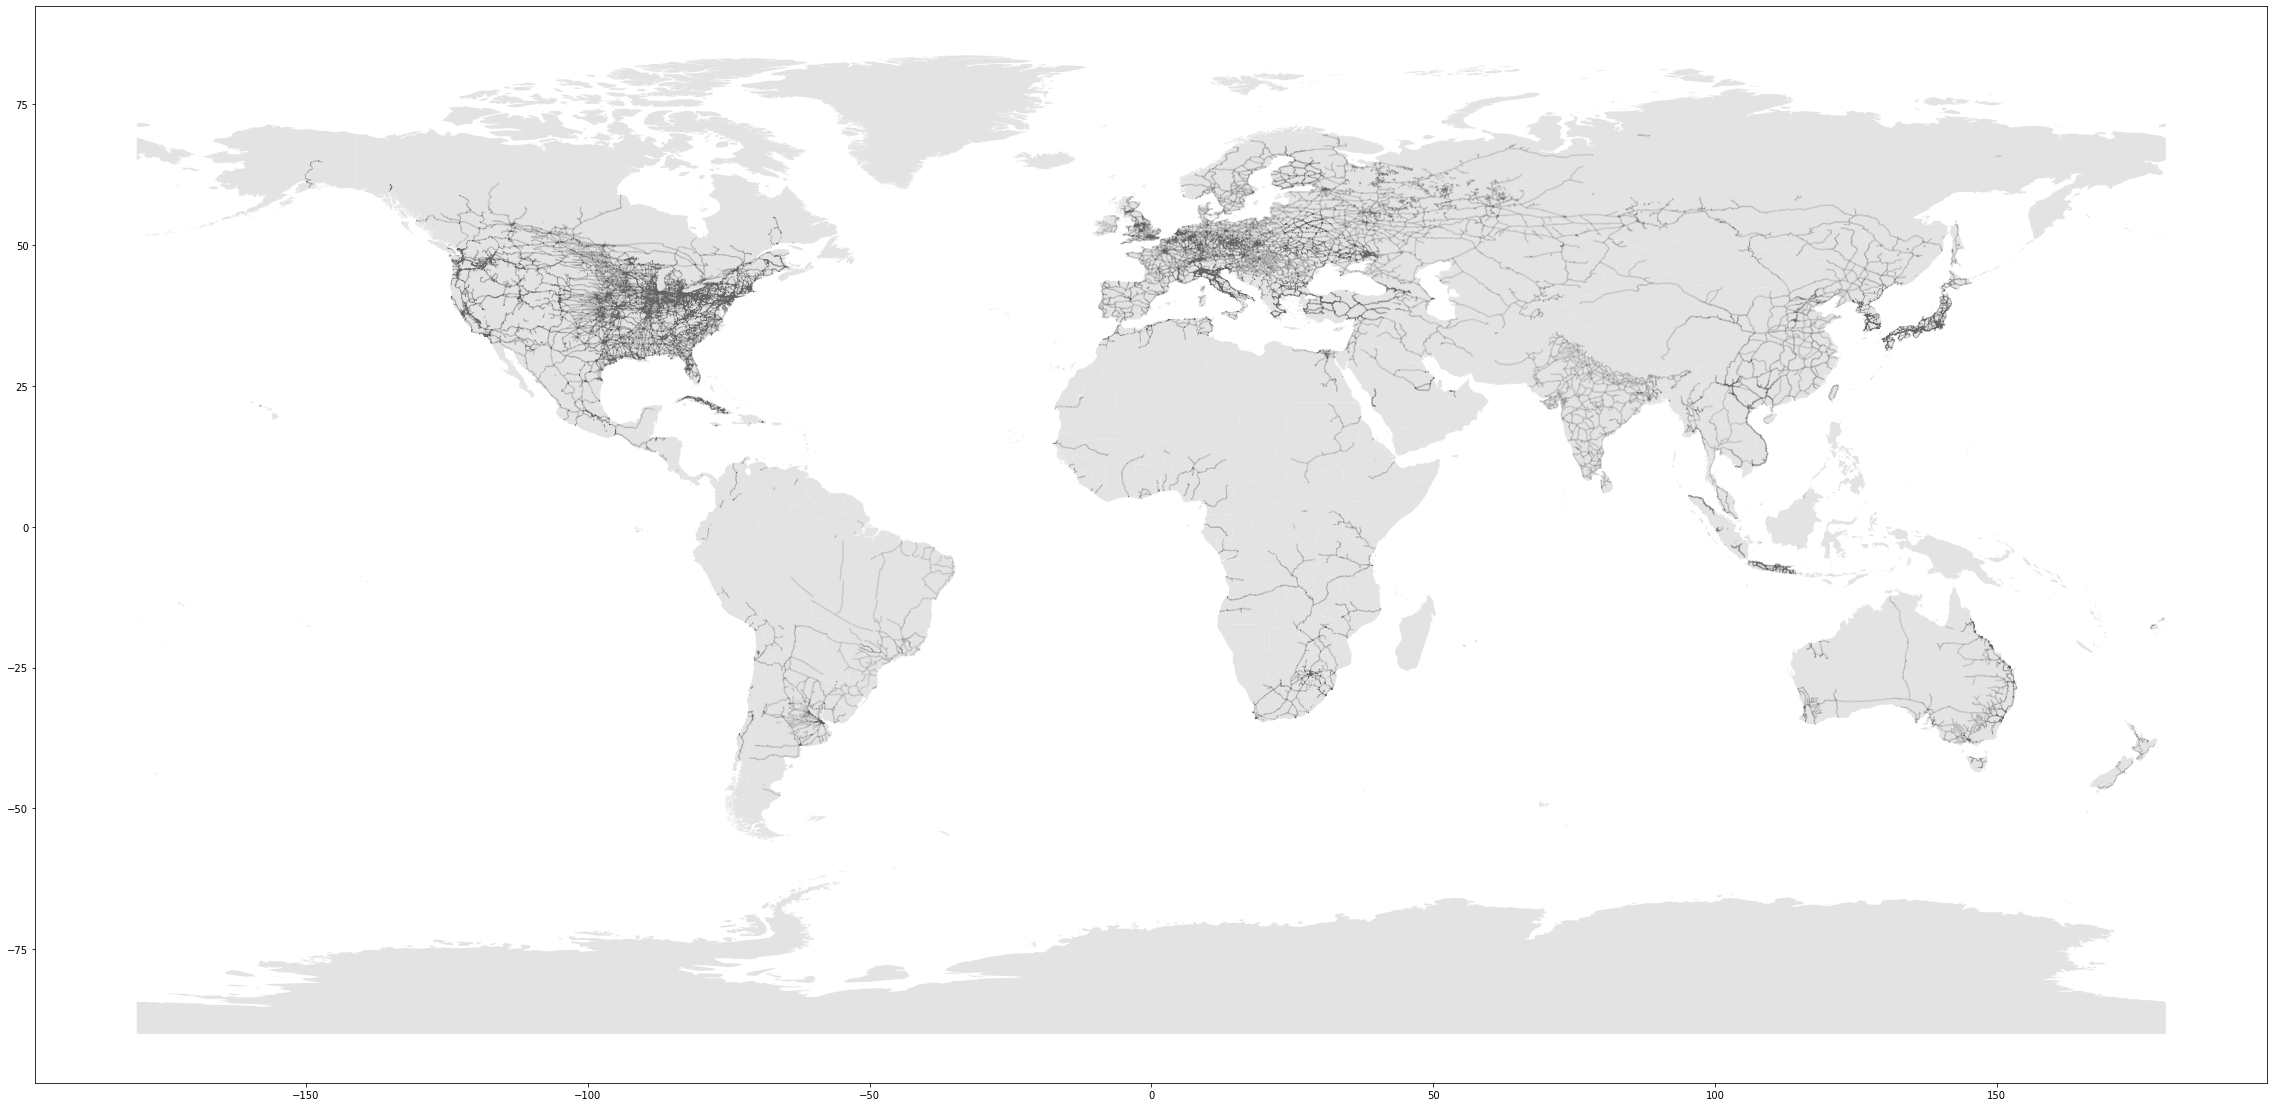

In [29]:
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
r_e_pre.plot(ax=ax, color=colors['railways'], alpha=0.2)

### Visualise railways post

In [30]:
railways_e_post = pd.read_csv(os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'))

In [31]:
railways_e_post = railways_e_post.merge(railways_n_pre[['coordinates','RailwayNodeID:ID(RailwayNode)']], how='left',left_on='StartNodeId:START_ID(RailwayNode)', right_on='RailwayNodeID:ID(RailwayNode)')

In [33]:
railways_e_post = railways_e_post.merge(railways_n_pre[['coordinates','RailwayNodeID:ID(RailwayNode)']], how='left',left_on='EndNodeId:END_ID(RailwayNode)', right_on='RailwayNodeID:ID(RailwayNode)')

In [34]:
railways_e_post = railways_e_post.rename(columns={'coordinates_x':'start_coordinates','coordinates_y':'end_coordinates'})

In [35]:
railways_e_post['start_coordinates'] = railways_e_post['start_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)
railways_e_post['end_coordinates'] = railways_e_post['end_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)


In [36]:
railways_e_post['geometry'] = railways_e_post[['start_coordinates', 'end_coordinates']].values.tolist()

In [37]:
railways_e_post['geometry'] = railways_e_post['geometry'].apply(geometry.LineString)

In [38]:
r_e_post = gpd.GeoDataFrame(railways_e_post, geometry=railways_e_post['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


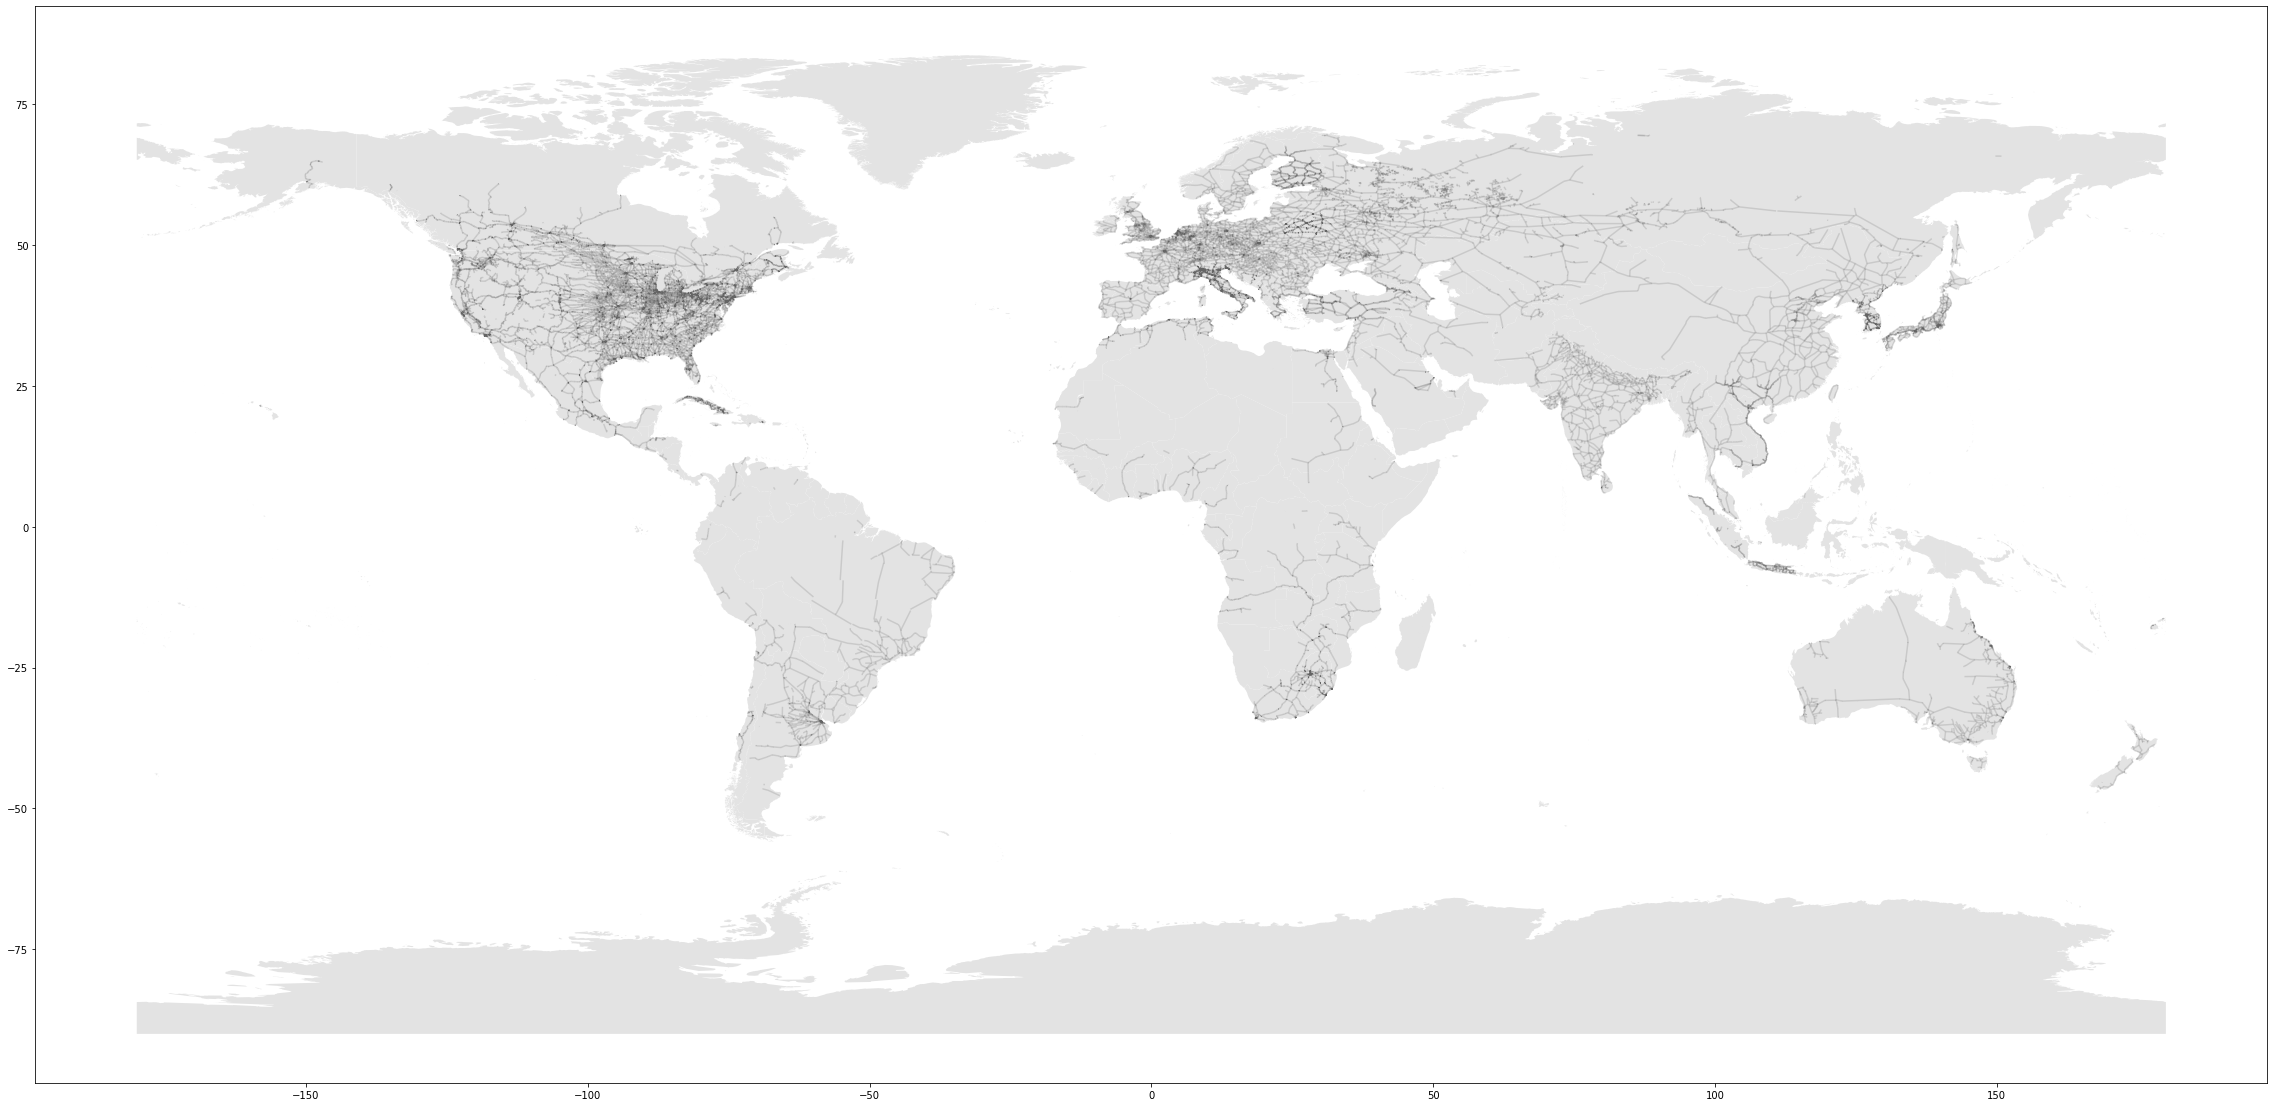

In [39]:
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
r_e_post.plot(ax=ax, color=colors['railways'], alpha=0.2)

### This also looks good...

In [40]:
railways_e_post

,Unnamed: 0,StartNodeId:START_ID(RailwayNode),EndNodeId:END_ID(RailwayNode),:TYPE,distance,impedance,start_coordinates,RailwayNodeID:ID(RailwayNode)_x,end_coordinates,RailwayNodeID:ID(RailwayNode)_y,geometry
0,0,railway_node_-40.779270833828264-5.53331712476...,railway_node_-40.83752818595551-5.514524011734167,RAILWAY_CONNECTION,6.664038,44.409404,"[-40.779270833828264, -5.533317124762516]",railway_node_-40.779270833828264-5.53331712476...,"[-40.83752818595551, -5.514524011734167]",railway_node_-40.83752818595551-5.514524011734167,"LINESTRING (-40.77927 -5.53332, -40.83753 -5.5..."
1,1,railway_node_-40.83752818595551-5.514524011734167,railway_node_-40.93003264354375-5.502205252584907,RAILWAY_CONNECTION,10.331537,106.740665,"[-40.83752818595551, -5.514524011734167]",railway_node_-40.83752818595551-5.514524011734167,"[-40.93003264354375, -5.502205252584907]",railway_node_-40.93003264354375-5.502205252584907,"LINESTRING (-40.83753 -5.51452, -40.93003 -5.5..."
2,2,railway_node_98.2259611453085614.097502175406158,railway_node_98.2259611456299814.008849119211256,RAILWAY_CONNECTION,1.409538,1.986798,"[98.22596114530856, 14.097502175406158]",railway_node_98.2259611453085614.097502175406158,"[98.22596114562998, 14.008849119211256]",railway_node_98.2259611456299814.008849119211256,"LINESTRING (98.22596 14.09750, 98.22596 14.00885)"
3,3,railway_node_98.7091203031048112.519477771140751,railway_node_98.6470631639549112.430824715657089,RAILWAY_CONNECTION,7.054484,49.765746,"[98.70912030310481, 12.519477771140751]",railway_node_98.7091203031048112.519477771140751,"[98.64706316395491, 12.430824715657089]",railway_node_98.6470631639549112.430824715657089,"LINESTRING (98.70912 12.51948, 98.64706 12.43082)"
4,4,railway_node_102.5298276244302124.32885402138423,railway_node_102.4715527147770924.212340128139974,RAILWAY_CONNECTION,7.056217,49.790193,"[102.52982762443021, 24.32885402138423]",railway_node_102.5298276244302124.32885402138423,"[102.47155271477709, 24.212340128139974]",railway_node_102.4715527147770924.212340128139974,"LINESTRING (102.52983 24.32885, 102.47155 24.2..."
...,...,...,...,...,...,...,...,...,...,...,...
1100603,1100603,railway_node_-89.0929639999933741.326838999931674,railway_node_-89.0970900005081741.3266380000003,RAILWAY_CONNECTION,0.458502,0.210224,"[-89.09296399999337, 41.326838999931674]",railway_node_-89.0929639999933741.326838999931674,"[-89.09709000050817, 41.3266380000003]",railway_node_-89.0970900005081741.3266380000003,"LINESTRING (-89.09296 41.32684, -89.09709 41.3..."
1100604,1100604,railway_node_-89.0091439995878241.34285699998686,railway_node_-89.0113159998883841.34278499978954,RAILWAY_CONNECTION,0.241364,0.058257,"[-89.00914399958782, 41.34285699998686]",railway_node_-89.0091439995878241.34285699998686,"[-89.01131599988838, 41.34278499978954]",railway_node_-89.0113159998883841.34278499978954,"LINESTRING (-89.00914 41.34286, -89.01132 41.3..."
1100605,1100605,railway_node_-89.1091240005421741.32679000038961,railway_node_-89.1102909998114841.32665100006053,RAILWAY_CONNECTION,0.129684,0.016818,"[-89.10912400054217, 41.32679000038961]",railway_node_-89.1091240005421741.32679000038961,"[-89.11029099981148, 41.32665100006053]",railway_node_-89.1102909998114841.32665100006053,"LINESTRING (-89.10912 41.32679, -89.11029 41.3..."
1100606,1100606,railway_node_-89.0531760002772841.2981249996904,railway_node_-89.0577789995881541.300716000260884,RAILWAY_CONNECTION,0.511531,0.261664,"[-89.05317600027728, 41.2981249996904]",railway_node_-89.0531760002772841.2981249996904,"[-89.05777899958815, 41.300716000260884]",railway_node_-89.0577789995881541.300716000260884,"LINESTRING (-89.05318 41.29812, -89.05778 41.3..."
